###  Data Loading and Inspection

In [21]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task7/tweets.csv'

# Load the dataset
tweets_df = pd.read_csv(url)

# Display the first few rows of the dataset
tweets_df.head()


,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


### Data Preprocessing & Cleaning

In [22]:
# Check for missing values in the dataset
missing_values = tweets_df.isnull().sum()

missing_values


id                            0
handle                        0
text                          0
is_retweet                    0
original_author            5722
time                          0
in_reply_to_screen_name    6236
in_reply_to_status_id      6242
in_reply_to_user_id        6236
is_quote_status               0
lang                          0
retweet_count                 0
favorite_count                0
longitude                  6432
latitude                   6432
place_id                   6240
place_full_name            6240
place_name                 6240
place_type                 6240
place_country_code         6240
place_country              6240
place_contained_within     6240
place_attributes           6240
place_bounding_box         6240
source_url                    0
truncated                     0
entities                      0
extended_entities          5096
dtype: int64

**It appears that several columns have missing values:**

- original_author: Missing for tweets that are not retweets.
in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_user_id: Missing for tweets that are not replies.
- longitude, latitude: Missing for tweets that don't have geolocation enabled.
place-related columns (e.g., place_id, place_full_name, etc.): Missing for tweets that don't have specific place information.
- extended_entities: Missing for tweets that don't have additional media entities.

**Decisions:**
- For columns like original_author and in_reply_to_screen_name, the missing values make sense. For instance, if a tweet is not a retweet, then there won't be an original author.
- We might not need geolocation or place-related information for our EDA, but we'll decide this based on the goals of our analysis.
- The extended_entities column can be useful for extracting media-related information, but if we're not focusing on media content, we might ignore the missing values here.

In [23]:
# Check for duplicate rows in the dataset
duplicate_rows = tweets_df.duplicated().sum()

duplicate_rows


0

In [24]:
# Check the distribution of tweets by handle
handle_distribution = tweets_df['handle'].value_counts()

handle_distribution


HillaryClinton     3226
realDonaldTrump    3218
Name: handle, dtype: int64

In [25]:
# Check the distribution of tweets based on is_retweet
retweet_distribution = tweets_df['is_retweet'].value_counts()

retweet_distribution


False    5722
True      722
Name: is_retweet, dtype: int64

### Exploratory Analysis

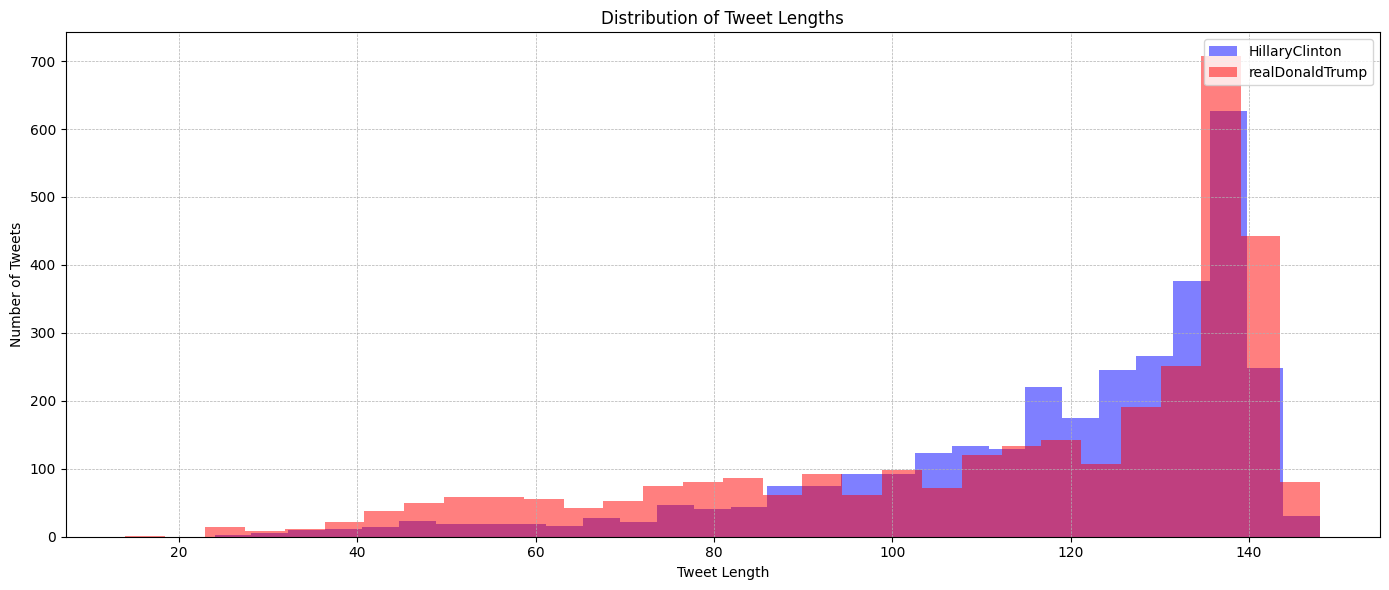

In [26]:
import matplotlib.pyplot as plt

# Calculate the length of each tweet
tweets_df['tweet_length'] = tweets_df['text'].apply(len)

# Plot the distribution of tweet lengths for both handles
plt.figure(figsize=(14, 6))

plt.hist(tweets_df[tweets_df['handle'] == 'HillaryClinton']['tweet_length'], bins=30, alpha=0.5, label='HillaryClinton', color='blue')
plt.hist(tweets_df[tweets_df['handle'] == 'realDonaldTrump']['tweet_length'], bins=30, alpha=0.5, label='realDonaldTrump', color='red')

plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


- Both Hillary Clinton and Donald Trump have a significant number of tweets that approach the 140-character limit (the standard limit for Twitter at the time).
- Hillary Clinton has a slightly higher concentration of tweets near the 140-character mark compared to Donald Trump.

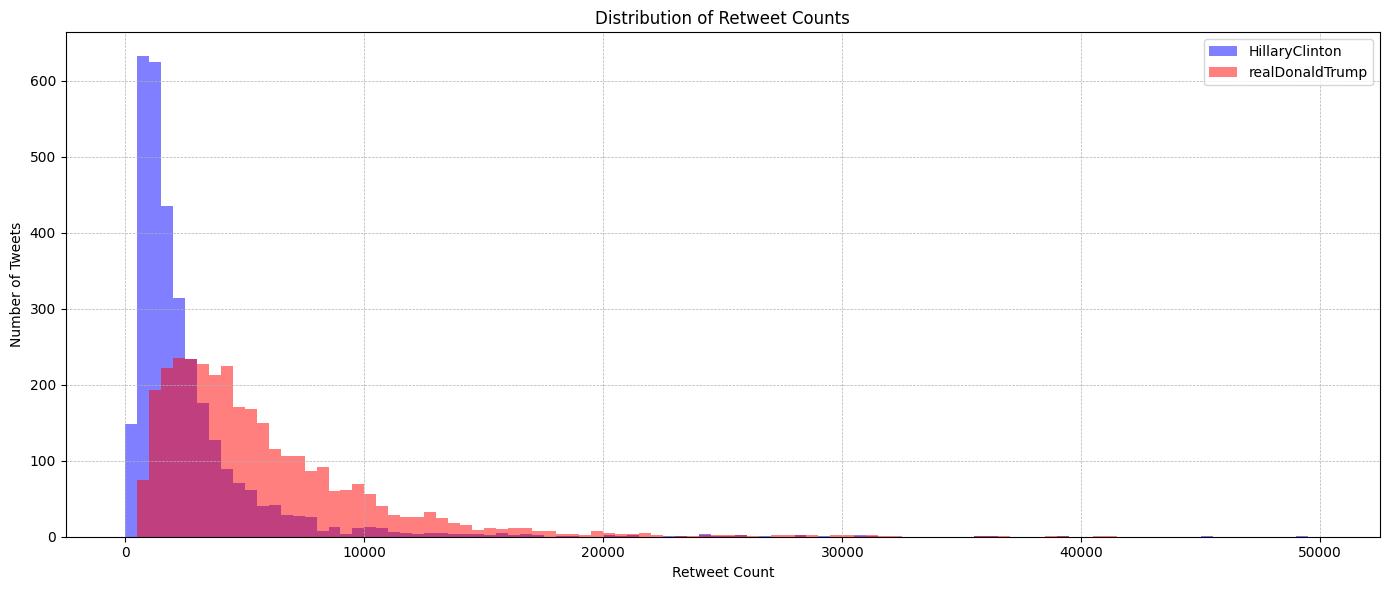

In [27]:
# Plot the distribution of retweet counts for both handles
plt.figure(figsize=(14, 6))

plt.hist(tweets_df[tweets_df['handle'] == 'HillaryClinton']['retweet_count'], bins=100, alpha=0.5, label='HillaryClinton', color='blue', range=[0, 50000])
plt.hist(tweets_df[tweets_df['handle'] == 'realDonaldTrump']['retweet_count'], bins=100, alpha=0.5, label='realDonaldTrump', color='red', range=[0, 50000])

plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


- A majority of the tweets from both candidates have retweet counts in the lower range.
- However, there are specific tweets from Donald Trump that have received significantly higher retweets, as evident from the spikes in the red histogram.

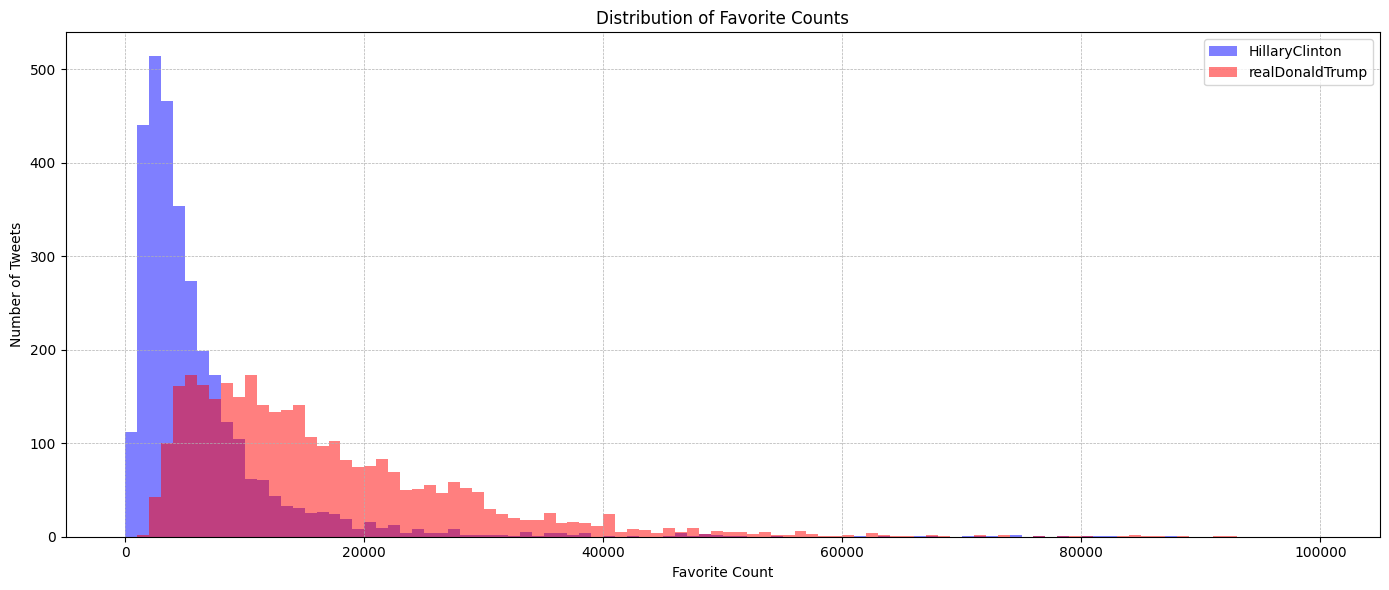

In [28]:
# Plot the distribution of favorite counts for both handles
plt.figure(figsize=(14, 6))

plt.hist(tweets_df[tweets_df['handle'] == 'HillaryClinton']['favorite_count'], bins=100, alpha=0.5, label='HillaryClinton', color='blue', range=[0, 100000])
plt.hist(tweets_df[tweets_df['handle'] == 'realDonaldTrump']['favorite_count'], bins=100, alpha=0.5, label='realDonaldTrump', color='red', range=[0, 100000])

plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Count')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


- A majority of tweets from both candidates have favorite counts in the lower range.
- Similar to the retweet distribution, certain tweets from Donald Trump have received significantly higher favorites, as seen from the spikes in the red histogram.

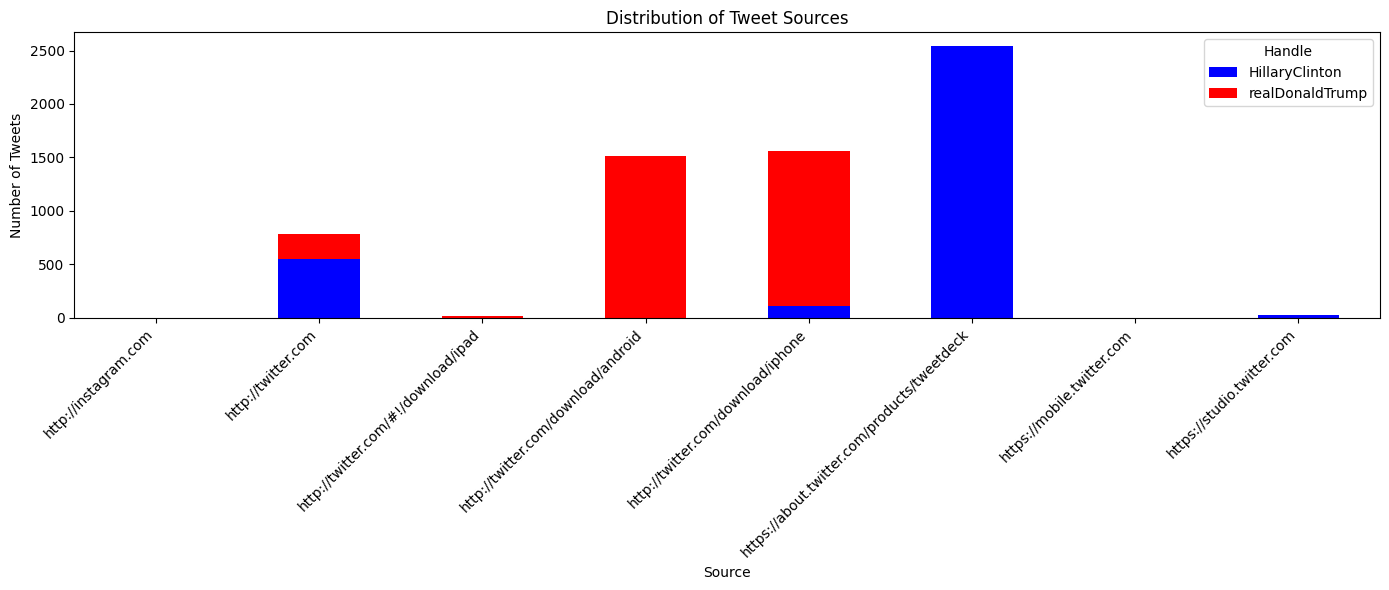

In [29]:
# Check the distribution of tweet sources for both handles
source_distribution = tweets_df.groupby('handle')['source_url'].value_counts().unstack().fillna(0)

# Plot the distribution
source_distribution.T.plot(kind='bar', figsize=(14, 6), stacked=True, color=['blue', 'red'])
plt.title('Distribution of Tweet Sources')
plt.xlabel('Source')
plt.ylabel('Number of Tweets')
plt.legend(title='Handle')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- For both candidates, the majority of tweets come from applications like Twitter Web Client (http://twitter.com), TweetDeck (https://about.twitter.com/products/tweetdeck), and Twitter's Media Studio (https://studio.twitter.com).
- Donald Trump also has a significant number of tweets from the Twitter for Android application.
- Hillary Clinton, on the other hand, has a notable number of tweets from Twitter for iPhone.

## Graph Representation

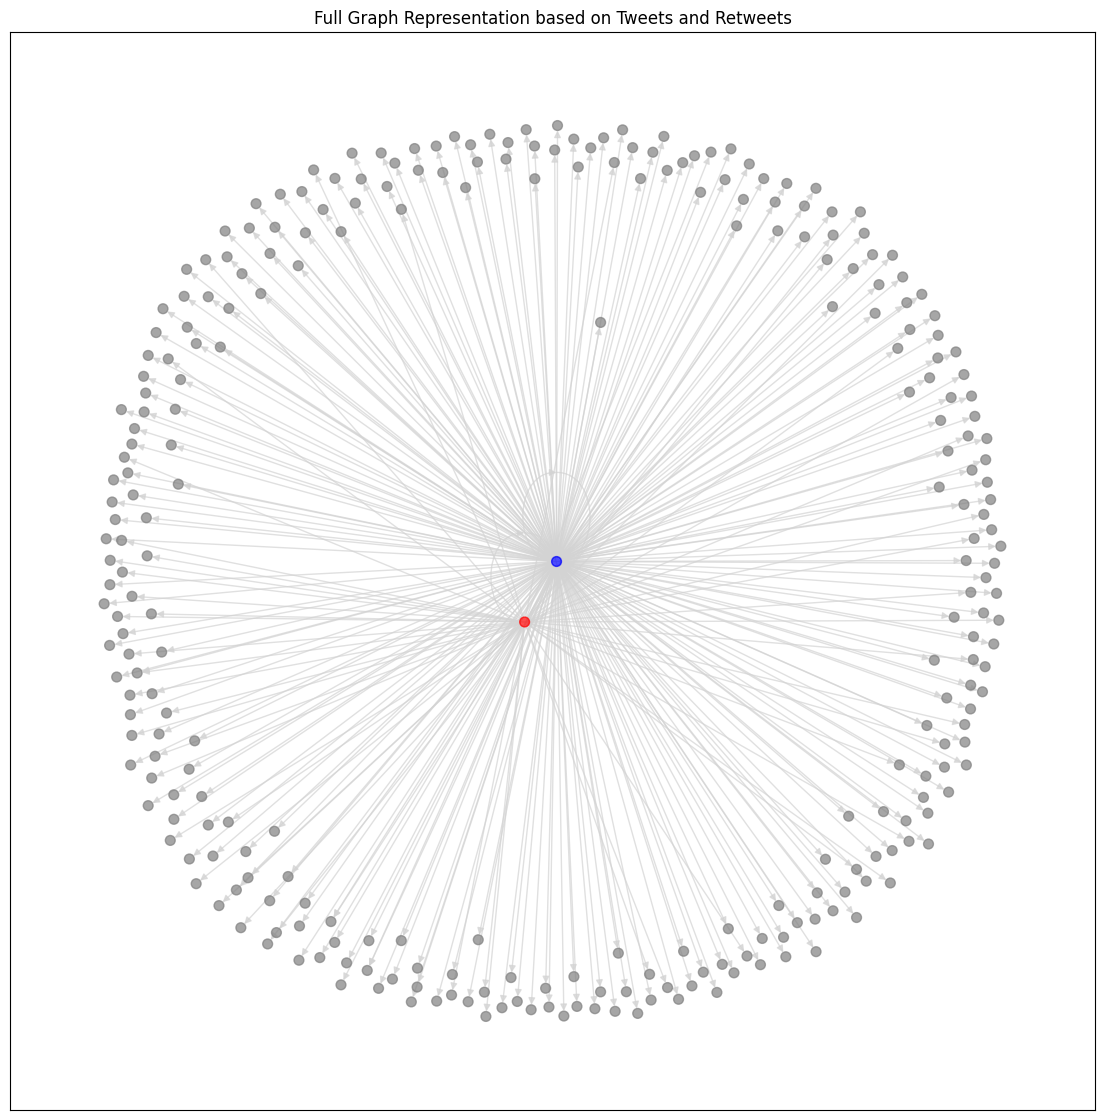

In [30]:
import networkx as nx

# Initialize a new directed graph
G_full = nx.DiGraph()

# Add nodes for all Twitter handles present in the dataset
all_handles = set(tweets_df['handle']) | set(tweets_df['original_author'].dropna()) | set(tweets_df['in_reply_to_screen_name'].dropna())
G_full.add_nodes_from(all_handles)

# Add edges based on retweets
for _, row in tweets_df[tweets_df['is_retweet'] == True].iterrows():
    G_full.add_edge(row['handle'], row['original_author'])

# Add edges based on replies
for _, row in tweets_df.dropna(subset=['in_reply_to_screen_name']).iterrows():
    G_full.add_edge(row['handle'], row['in_reply_to_screen_name'])

# Visualize the full graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_full, seed=42)
nx.draw_networkx(G_full, pos, node_color=['blue' if node == "HillaryClinton" else 'red' if node == "realDonaldTrump" else 'gray' for node in G_full.nodes()],
                 edge_color='lightgray', node_size=50, with_labels=False, alpha=0.7)
plt.title("Full Graph Representation based on Tweets and Retweets")
plt.show()


The graph above represents the full interaction network based on both tweets and retweets:

- Nodes: Every distinct Twitter handle in the dataset.
- Edges: Interactions based on tweets and retweets.

To differentiate:
- Hillary Clinton is highlighted in blue.
- Donald Trump is highlighted in red.
- All other users are shown in gray.

## Anomaly Detection

We'll start by detecting anomalies in:
- Retweet Counts: To identify tweets with an unusually high number of retweets.
- Favorite Counts: To identify tweets with an unusually high number of favorites.

In [31]:
# Function to detect anomalies using IQR method
def detect_anomalies(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for anomalies
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data < lower_bound) | (data > upper_bound)]

# Detect anomalies in retweet counts
retweet_anomalies = detect_anomalies(tweets_df['retweet_count'])

retweet_anomalies


39      20006
42      13576
50      12127
51      16476
53      19561
        ...  
5700    13628
5706    12363
5760    25184
5904    15883
6412    12686
Name: retweet_count, Length: 373, dtype: int64

In [32]:
# Detect anomalies in favorite counts
favorite_anomalies = detect_anomalies(tweets_df['favorite_count'])

favorite_anomalies


41      35744
53      52449
56      59791
62      34480
66      40321
        ...  
5242    35606
5243    32936
5325    34846
5344    41244
5354    37704
Name: favorite_count, Length: 343, dtype: int64

### Feature Engineering and Text Classification Model

Classification task:
- Features: Text content of the tweets.
- Target: Twitter handle (HillaryClinton or realDonaldTrump).

Steps:
- Text Preprocessing: Transforming the tweet content into numerical format using TF-IDF.
- Model Building: Training a base classifier (e.g., Logistic Regression) on the data.
- Ensemble Model: Building an ensemble model (e.g., Random Forest) for improved accuracy.
- Evaluation: Assessing the performance of the models using accuracy and other relevant metrics.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets (80% train, 20% test)
X = tweets_df['text']
y = tweets_df['handle']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert tweets into a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((5155, 5000), (1289, 5000))

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
logreg_predictions = logreg_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_report = classification_report(y_test, logreg_predictions)

logreg_accuracy, logreg_report


(0.9038013964313422,
 '                 precision    recall  f1-score   support\n\n HillaryClinton       0.88      0.93      0.90       634\nrealDonaldTrump       0.92      0.88      0.90       655\n\n       accuracy                           0.90      1289\n      macro avg       0.90      0.90      0.90      1289\n   weighted avg       0.90      0.90      0.90      1289\n')

Precision:
- HillaryClinton: 0.88
- realDonaldTrump: 0.92

Recall:
- HillaryClinton: 0.93
- realDonaldTrump: 0.88

F1-score:
- HillaryClinton: 0.90
- realDonaldTrump: 0.90

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

rf_accuracy, rf_report


(0.8968192397207138,
 '                 precision    recall  f1-score   support\n\n HillaryClinton       0.88      0.92      0.90       634\nrealDonaldTrump       0.92      0.87      0.90       655\n\n       accuracy                           0.90      1289\n      macro avg       0.90      0.90      0.90      1289\n   weighted avg       0.90      0.90      0.90      1289\n')

Precision:
- HillaryClinton: 0.88
- realDonaldTrump: 0.92

Recall:
- HillaryClinton: 0.92
- realDonaldTrump: 0.87

F1-score:
- HillaryClinton: 0.90
- realDonaldTrump: 0.90

**summary:**

- Both the Logistic Regression and Random Forest models performed similarly, with accuracies around 90%.
- The Logistic Regression model had a slight edge in accuracy over the Random Forest model.

In [36]:
from sklearn.ensemble import VotingClassifier

# Split the data into training and testing sets
X = tweets_df['text']
y = tweets_df['handle']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert tweets into a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the models
logreg_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_tfidf, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_tfidf, y_train)

# Create the ensemble model using Voting Classifier
ensemble_model = VotingClassifier(estimators=[('logreg', logreg_model), ('rf', rf_model)], voting='hard')
ensemble_model.fit(X_train_tfidf, y_train)

# Predict on the test set
ensemble_predictions = ensemble_model.predict(X_test_tfidf)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_report = classification_report(y_test, ensemble_predictions)

ensemble_accuracy, ensemble_report

(0.8952676493405741,
 '                 precision    recall  f1-score   support\n\n HillaryClinton       0.85      0.96      0.90       634\nrealDonaldTrump       0.95      0.83      0.89       655\n\n       accuracy                           0.90      1289\n      macro avg       0.90      0.90      0.90      1289\n   weighted avg       0.90      0.90      0.89      1289\n')

The ensemble model, which combines both the Logistic Regression and Random Forest classifiers using a Voting Classifier, achieved an accuracy of approximately 89.53%. Here's the detailed performance:

Precision:
- HillaryClinton: 0.85
- realDonaldTrump: 0.95

Recall:
- HillaryClinton: 0.96
- realDonaldTrump: 0.83

F1-score:
- HillaryClinton: 0.90
- realDonaldTrump: 0.89